In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-failure-clinical-data/heart_failure_clinical_records_dataset.csv


<span style="color:hotpink;font-size:30px;font-family: 'Lobster', cursive;"> If you like this notebook, Please *UPVOTE* ⭐️ as this *Motivates* ♡ to work more. </span>

<span style="color:dimgray;font-size:18px;font-family: 'Lobster', cursive;"> <b>Make you are on Version2 of this file. Version 1 has no documentation or obervation of the code</b> </span>

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
data=pd.read_csv('/kaggle/input/heart-failure-clinical-data/heart_failure_clinical_records_dataset.csv')

In [5]:
data.head(5)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


<div style="color:dimgray;font-size:18px;font-family: 'Caveat', cursive;"><center><b>Let's check Null and Non-Null count along with dtype of each column.</b></center></div>

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


<span style="color:dimgray;font-size:18px;font-family: 'Caveat', cursive;">Creating a set of differnt dtypes</span>


In [7]:
set(data.dtypes.tolist())

{dtype('int64'), dtype('float64')}

Dtype:
- int64
- float64

<div class="alert alert-block alert-info" style="color:seagreen;font-size:18px;">📌 <b>Histograms</b> represent the data distribution by forming bins along the range of the data and then drawing bars to show the number of observations that fall in each bin.  
</div>


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff0ec493bd0>,
      dtype=object)

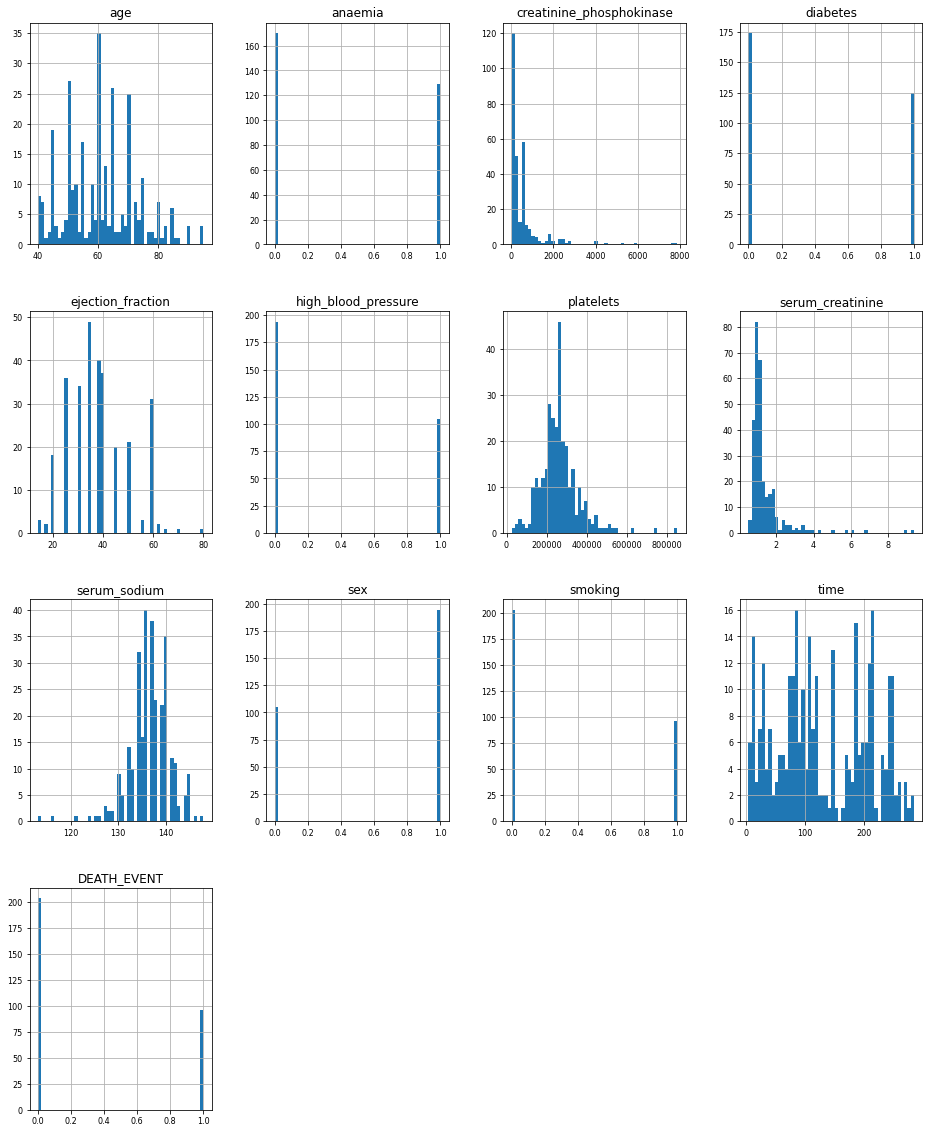

In [8]:
data.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

<div class="alert alert-block alert-info" style="color:seagreen;font-size:18px;">📌 <b>Correlation</b> is a statistical technique that can show whether and how strongly pairs of variables are related.</div>

In [9]:
data.corr()['DEATH_EVENT'][:-1]

age                         0.253729
anaemia                     0.066270
creatinine_phosphokinase    0.062728
diabetes                   -0.001943
ejection_fraction          -0.268603
high_blood_pressure         0.079351
platelets                  -0.049139
serum_creatinine            0.294278
serum_sodium               -0.195204
sex                        -0.004316
smoking                    -0.012623
time                       -0.526964
Name: DEATH_EVENT, dtype: float64

Here:  
  - diabetes
  - ejection_fraction
  - platelets
  - serum_sodium
  - sex
  - smoking 
  - time

is negative correlated and rest are postive correlated.

# 1. Categorical scatterplots


<div class="alert alert-block alert-info">💥 The default representation of the data in catplot() uses a scatterplot.</div>


The patient deceased during the follow-up period:  

**if true: then bolean value 1; else 0**


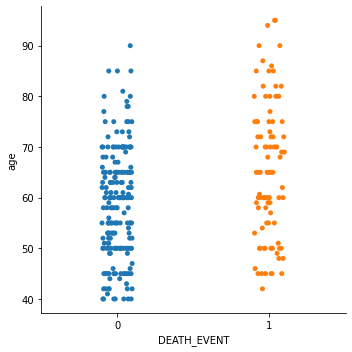

In [10]:
sns.catplot(x='DEATH_EVENT',y='age',data=data)

Observation: 
- As this plot shows that person with age less than 45 are not deceased during follow-up period;
- More number of people has not been deceased in compare to deceased one.

<span style="color:seagreen;font-size:18px;font-family: 'Lobster', cursive;">🔗 The jitter parameter controls the magnitude of jitter or disables it altogether</span>

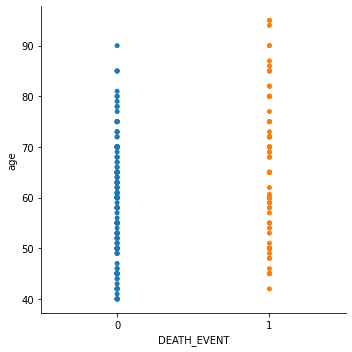

In [11]:
sns.catplot(x='DEATH_EVENT',y='age',data=data,jitter=False)

<div class="alert alert-block alert-info">💥 <b>kind='swarm' </b> adjusts the points along the categorical axis using an algorithm that prevents them from overlapping. It can give a better representation of the distribution of observations, although it only works well for relatively small datasets.</div>

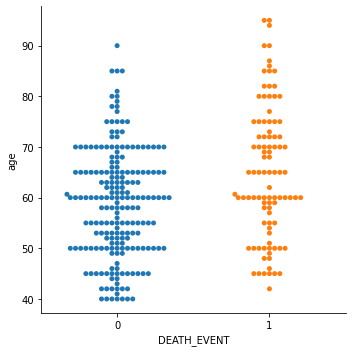

In [12]:
sns.catplot(x='DEATH_EVENT',y='age',data=data,kind='swarm')

Observation:  
- Person at age of 60 are most deceased as well as most non-deceased compare to to other age group.

**Sex**:
- Women: 0
- Men: 1

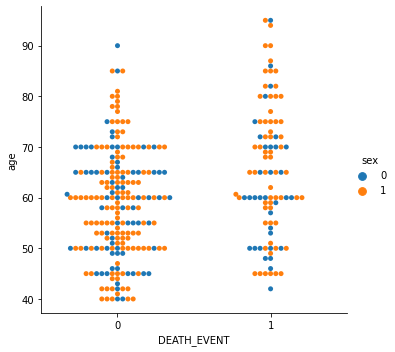

In [13]:
sns.catplot(x='DEATH_EVENT',y='age',hue='sex',data=data,kind='swarm')

Observation:
- Most non-deceased person are men.
- Most womens at the age of 60 are deceased.

**Smoking**:
- if person smokes then 1
- else 0


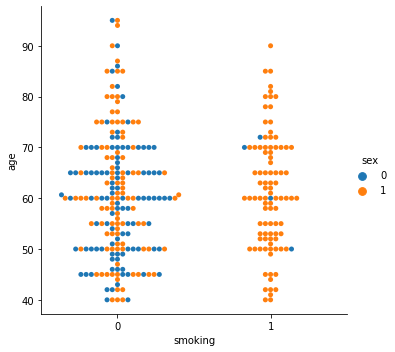

In [14]:
sns.catplot(x='smoking',y='age',hue='sex',data=data,kind='swarm')

Observation:
- Most smoking person are men.
- Large number of people don't smoke in compare to those who smokes

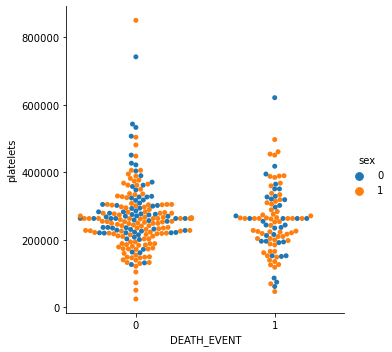

In [15]:
sns.catplot(x='DEATH_EVENT',y='platelets',hue='sex',data=data,kind='swarm')

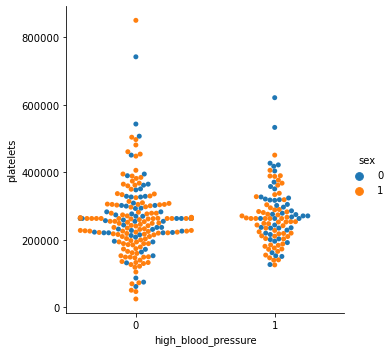

In [16]:
sns.catplot(x='high_blood_pressure',y='platelets',hue='sex',data=data,kind='swarm')

Observation:
- Large number of people in range of 200k to 400k platelets are not deceased(has no heart failure)
- Most deceased person are men.

**High-Blood Pressure**:

  If the patient has hypertension (boolean)
  - True=1
  - False=0

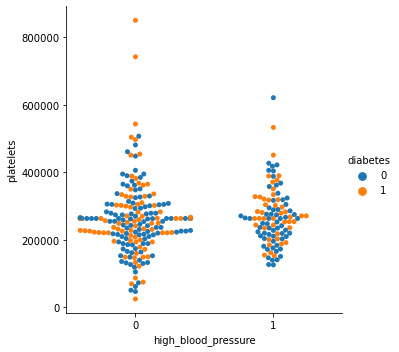

In [17]:
sns.catplot(x='high_blood_pressure',y='platelets',hue='diabetes',data=data,kind='swarm')

Observation:
- Large number of people in range of around 200k to 400k platelets has no high-blood Pressure.
- In campare to womens, men are more likely to be hypertension.

**Diabetes**

If the patient has diabetes (boolean):  
  - True=1  
  - False=0  

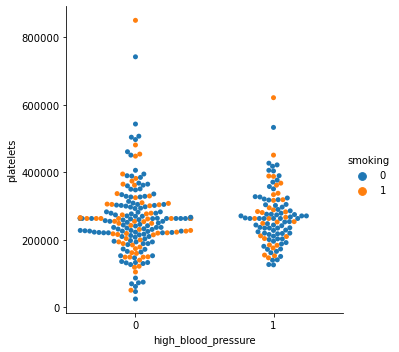

In [18]:
sns.catplot(x='high_blood_pressure',y='platelets',hue='smoking',data=data,kind='swarm')

Observation:
- Large number of people in range of around 200k to 400k platelets has no high-blood Pressure and also most them are diabetes free.
- Person having Platelets below 200k with no high-BP are diabetic.

**Anaemia**: Decrease of red blood cells or hemoglobin

- True=1
- False=0

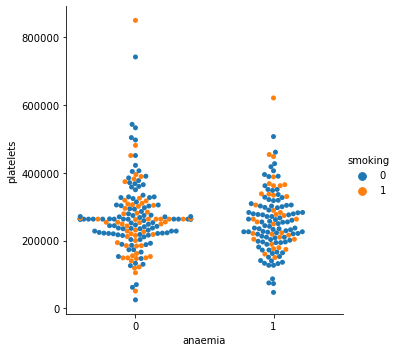

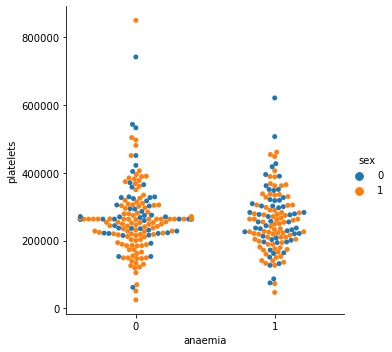

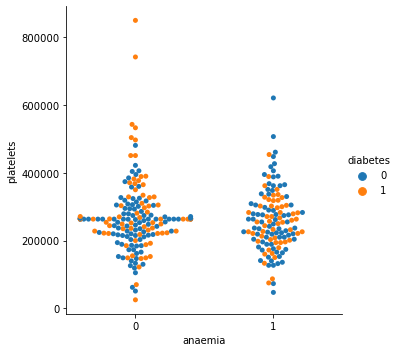

In [19]:
x=sns.catplot(x='anaemia',y='platelets',hue='smoking',data=data,kind='swarm')
y=sns.catplot(x='anaemia',y='platelets',hue='sex',data=data,kind='swarm')
z=sns.catplot(x='anaemia',y='platelets',hue='diabetes',data=data,kind='swarm')

Observation:   
- Plot 1
    - People who have Anaemia don't smoke often.
- Plot 2
    - Most People who have platletes between 200k & 400k are free from Anaemia and most of them are Male.
    - People who have Anemia are mostly men.
- Plot 3
    - Most People who have platletes between 200k & 400k and free from Anaemia are also free from diabetes.

# 2. Boxplots

<div class="alert alert-block alert-info">💥 <b>A box plot (also known as box and whisker plot)</b> is a type of chart often used in <b>explanatory data analysis to visually show the distribution of numerical data and skewness through displaying the data quartiles (or percentiles) and averages</b>. The “whiskers” extend to points that lie within 1.5 IQRs of the lower and upper quartile, and then observations that fall outside this range are displayed independently. You can assume those as a <b>Outlier</b>. </div>

<span style="color:seagreen;font-size:18px;font-family: 'Lobster', cursive;">🔗 When adding a <b>hue semantic</b>, the box for each level of the semantic variable is moved along the categorical axis so they don’t overlap</span>

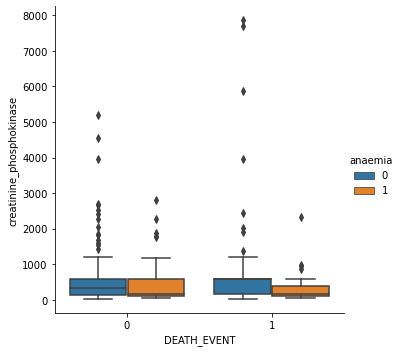

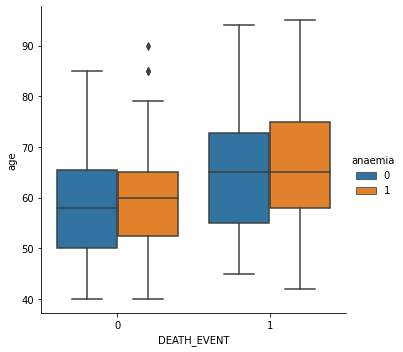

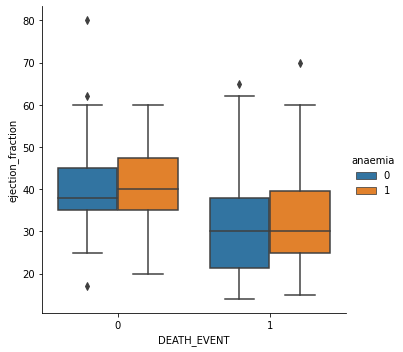

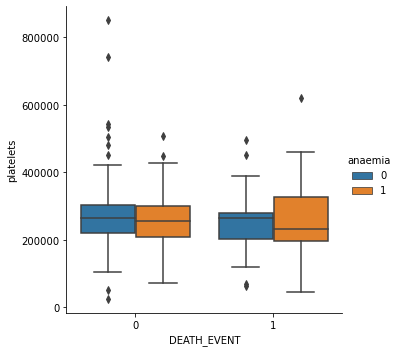

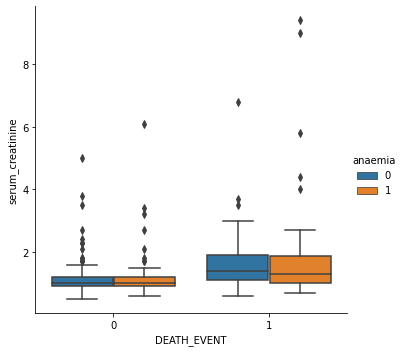

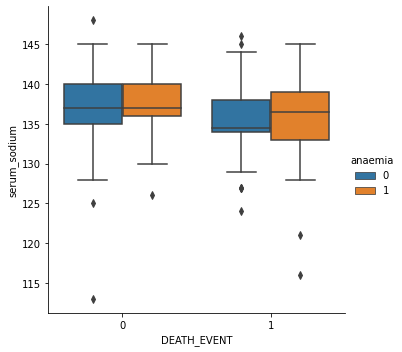

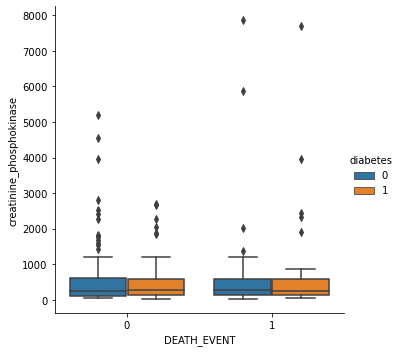

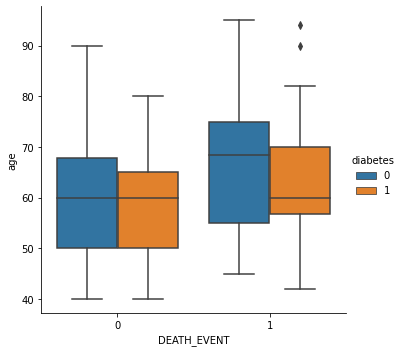

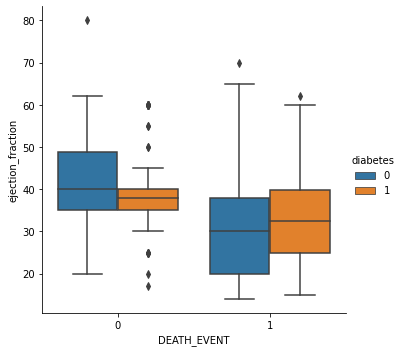

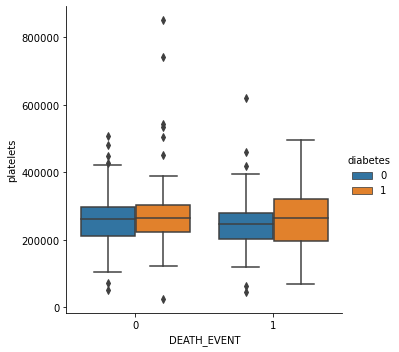

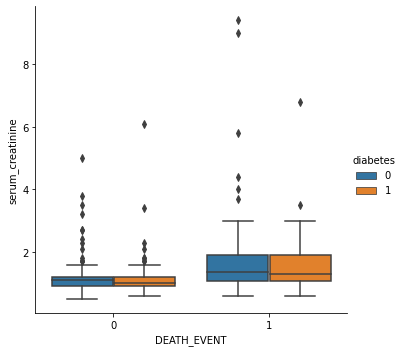

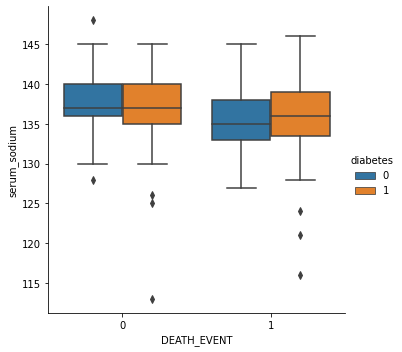

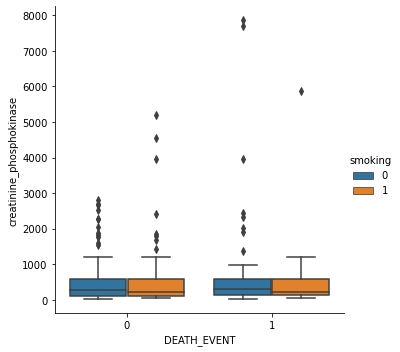

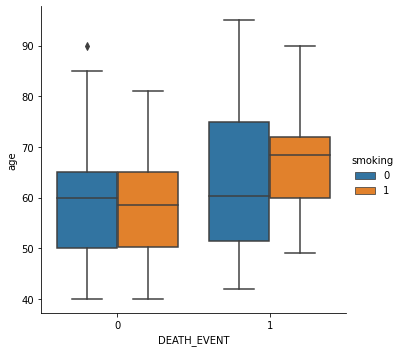

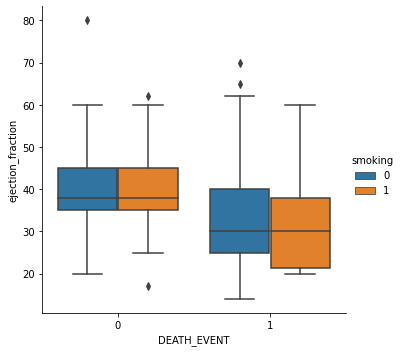

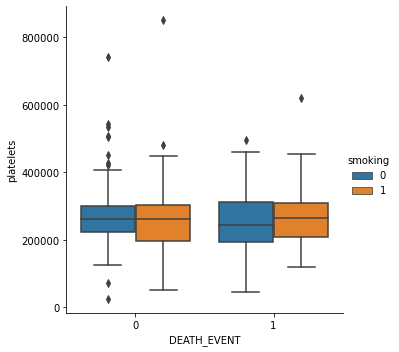

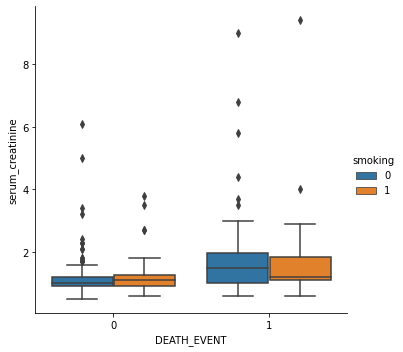

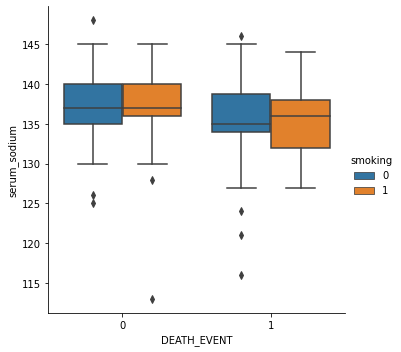

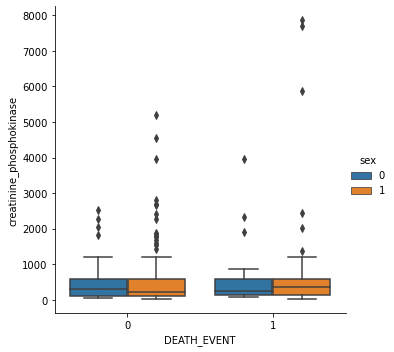

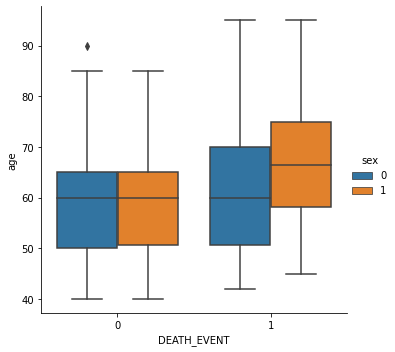

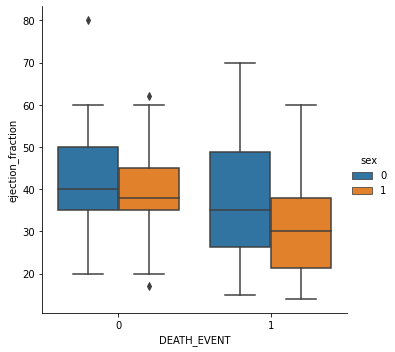

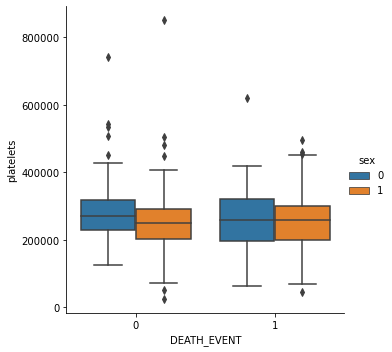

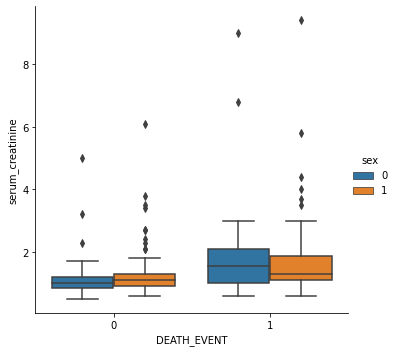

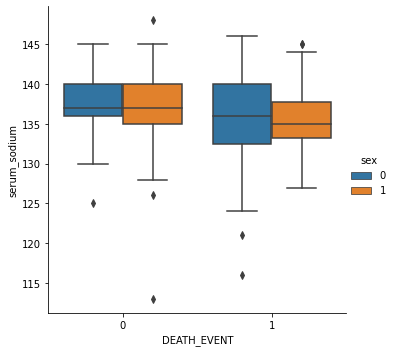

In [20]:
cat=['anaemia','diabetes','smoking','sex']
con=['creatinine_phosphokinase','age','ejection_fraction','platelets','serum_creatinine','serum_sodium']
for x in cat:
  for y in con:
      sns.catplot(x='DEATH_EVENT',y=y,hue=x,kind='box',data=data)

Observation:
- creatinine_phosphokinase feature is less dispersed
- Males having higher median relative to female in case of non-deceased event
- ejection_fraction over males in case of non-deceased event has higher median.
- platelets feature is less dispersed, also it has skewness.
- serum_creatinine is less dispersed and has a very small skewness.
- serum_sodium has skewness in it's nature.

<span style="color:seagreen;font-size:18px;font-family: 'Lobster', cursive;">📍Kind="boxen"</span>

<div class="alert alert-block alert-info"> <b><i>boxenplot(), draws a plot that is similar to a box plot but optimized for showing more information about the shape of the distribution. It is best suited for larger datasets,  By plotting more quantiles, it provides more information about the shape of the distribution, particularly in the tails.</b> </div>

Example:

![image](https://cdn.askpython.com/wp-content/uploads/2020/03/Seaborn-boxenplot.png)



Souce: Google Image

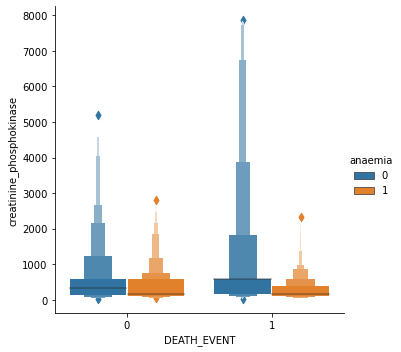

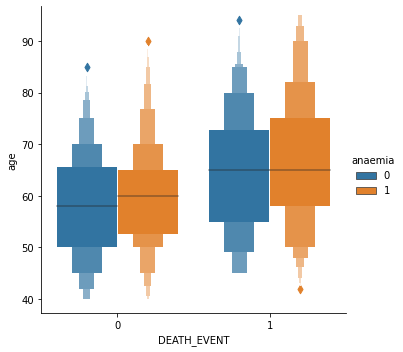

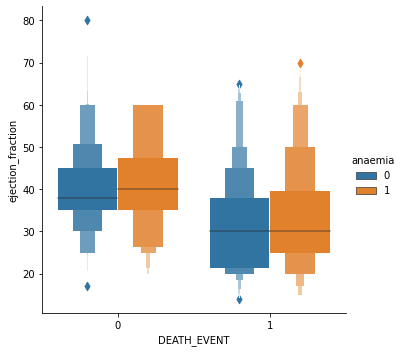

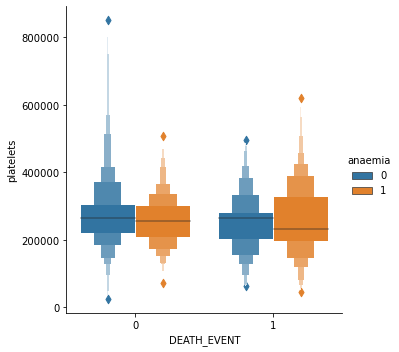

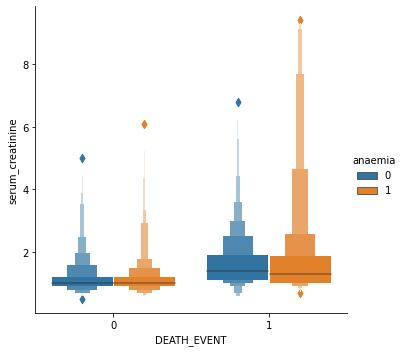

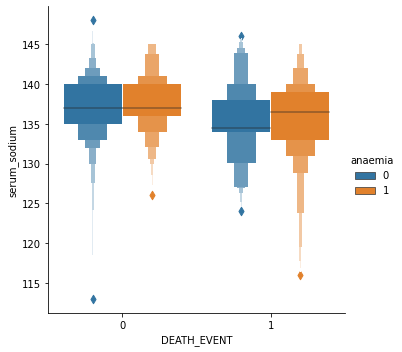

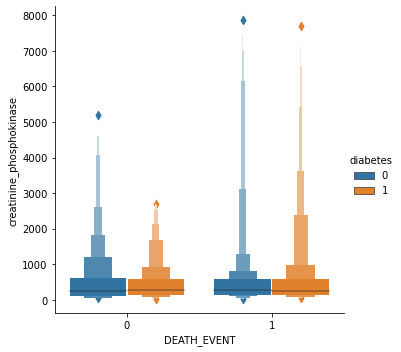

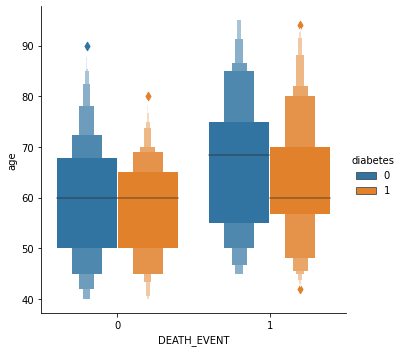

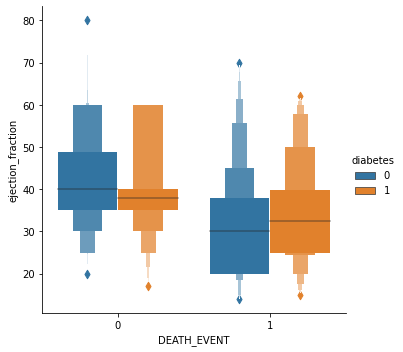

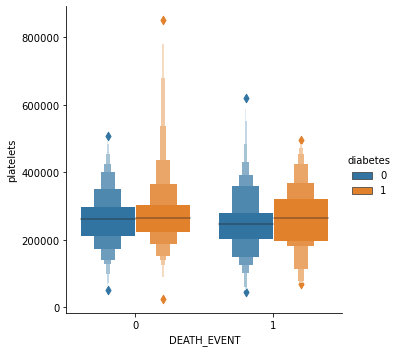

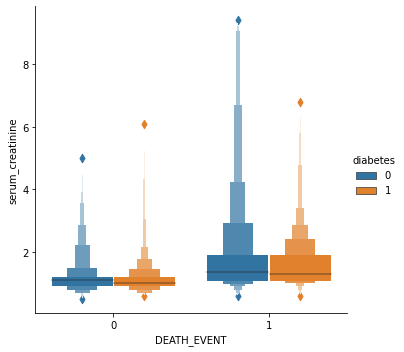

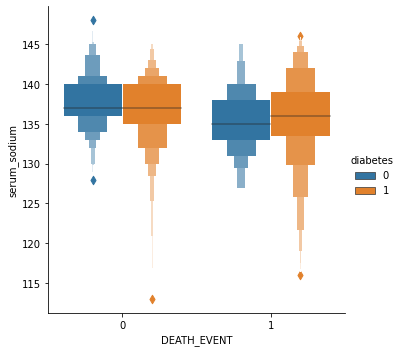

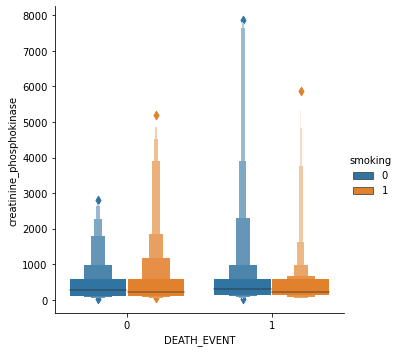

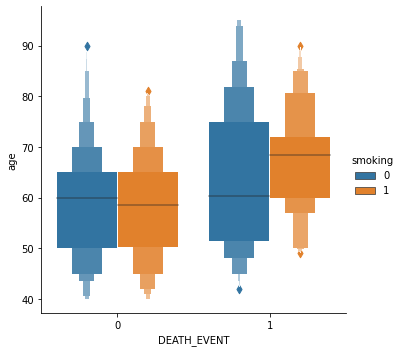

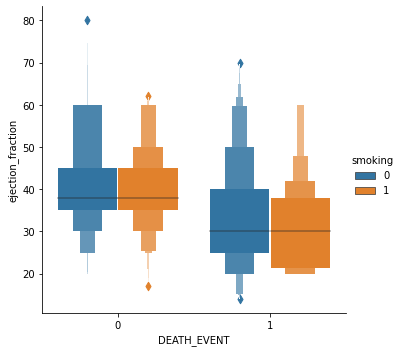

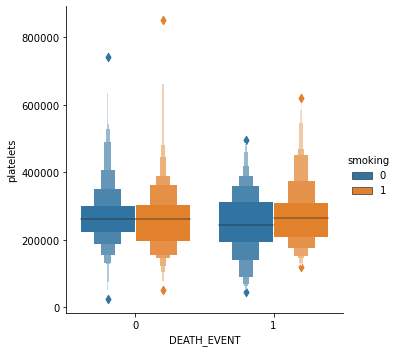

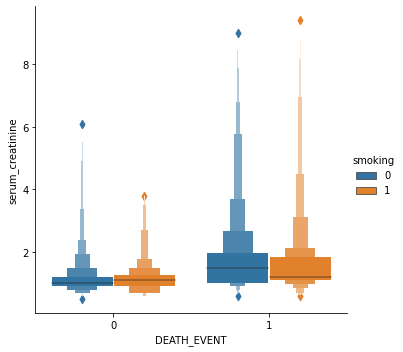

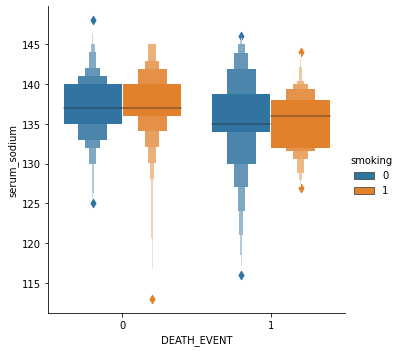

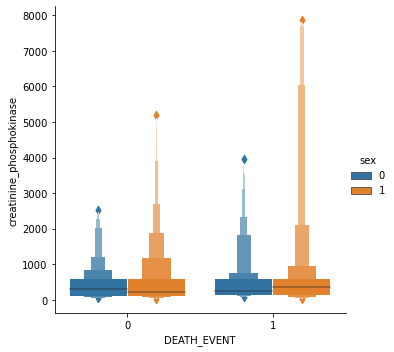

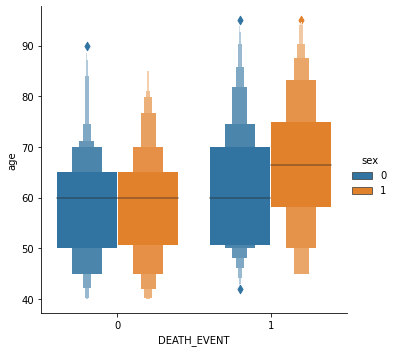

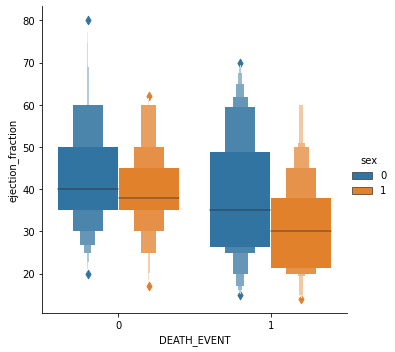

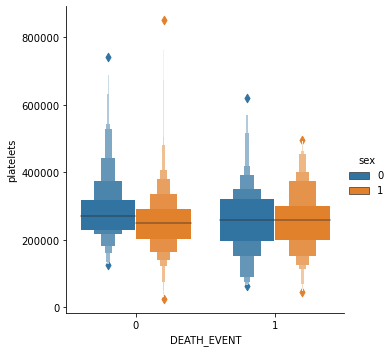

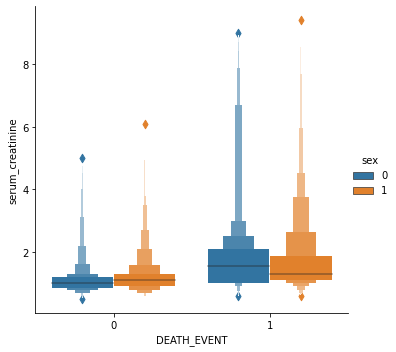

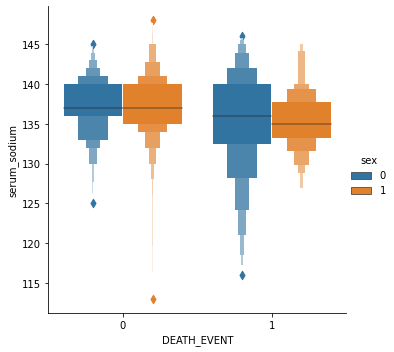

In [21]:
cat=['anaemia','diabetes','smoking','sex']
con=['creatinine_phosphokinase','age','ejection_fraction','platelets','serum_creatinine','serum_sodium']
for x in cat:
  for y in con:
      sns.catplot(x='DEATH_EVENT',y=y,hue=x,kind='boxen',data=data)

# 3.Violinplots

<div class="alert alert-block alert-info">📌 <b>A violin plot</b> is a method of plotting numeric data. It is similar to a box plot, with the addition of a rotated kernel density plot on each side. Violin plots are similar to box plots, except that they also show the probability density of the data at different values, usually smoothed by a kernel density estimator.</div>

![img](https://www.researchgate.net/profile/Jonathan_Chambers3/publication/329035470/figure/fig15/AS:695026912870412@1542718737802/Explanation-of-Violin-plot-Densities-are-estimated-using-a-Gaussian-kernel-density.png)


Source:: Google Image

<span style="color:seagreen;font-size:18px;font-family: 'Lobster', cursive;">📍Kind="violin"</span>

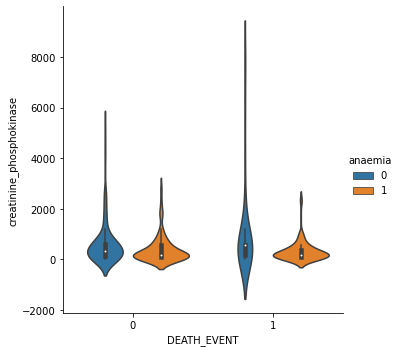

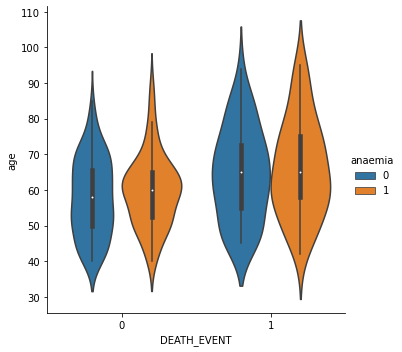

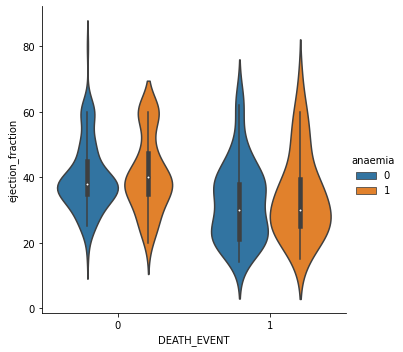

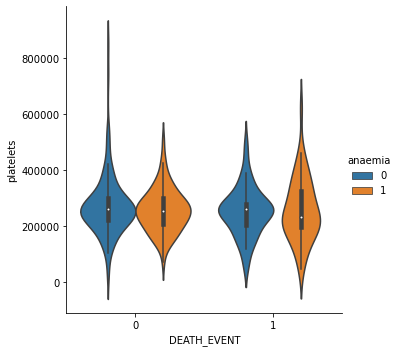

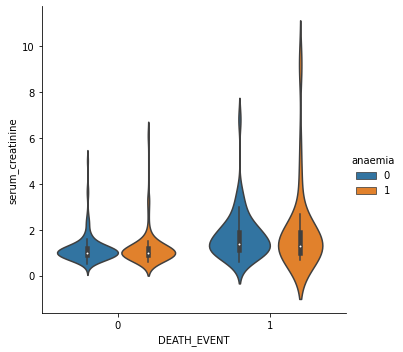

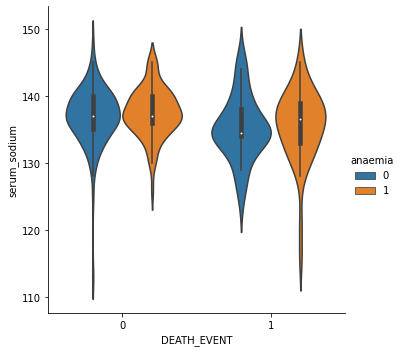

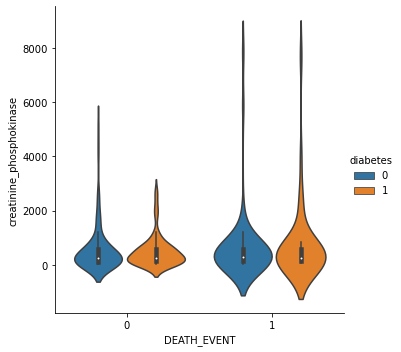

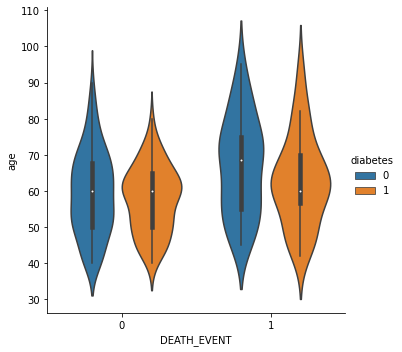

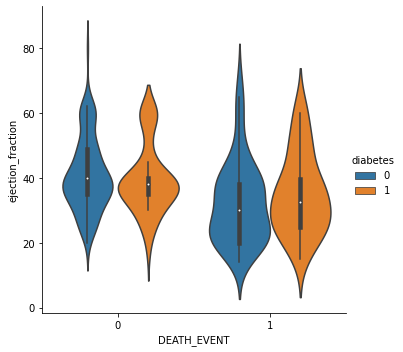

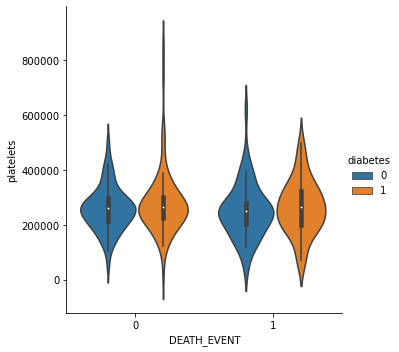

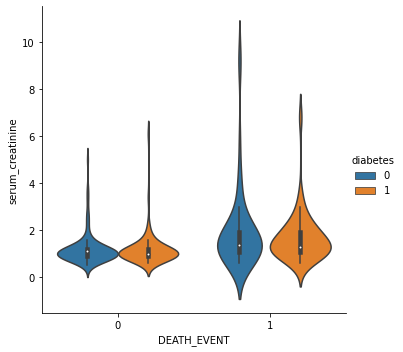

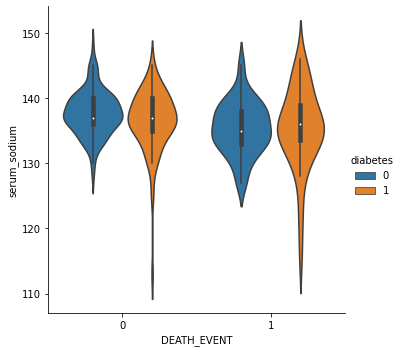

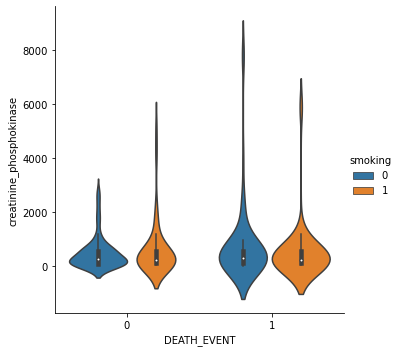

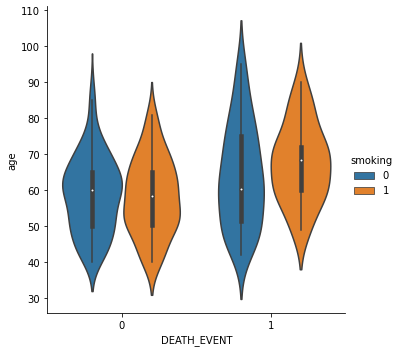

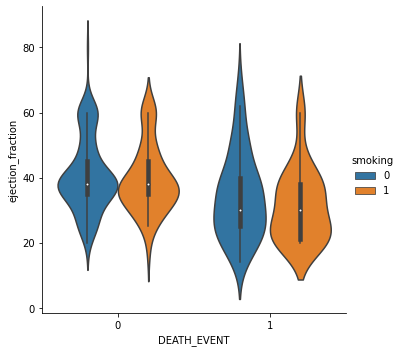

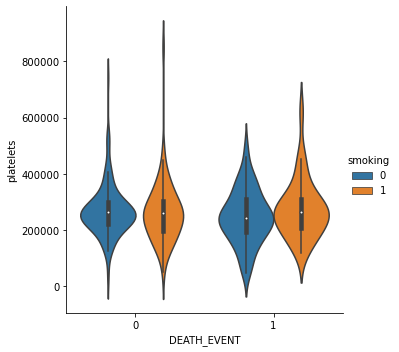

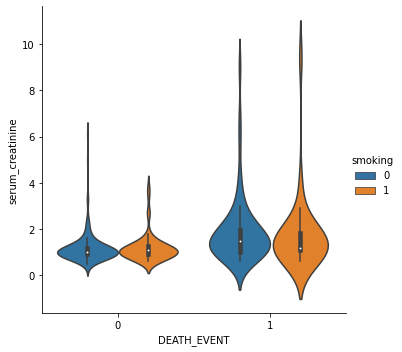

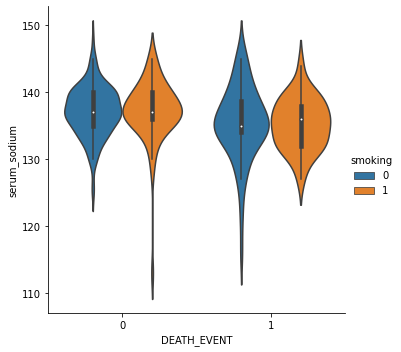

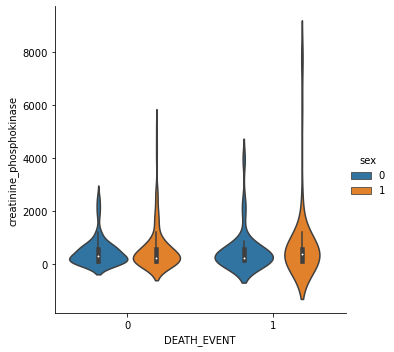

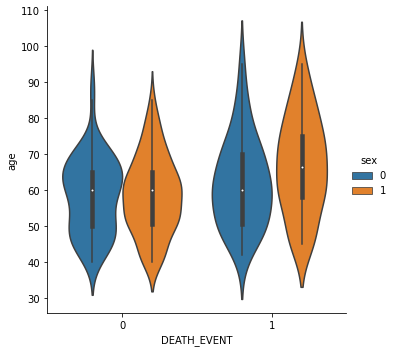

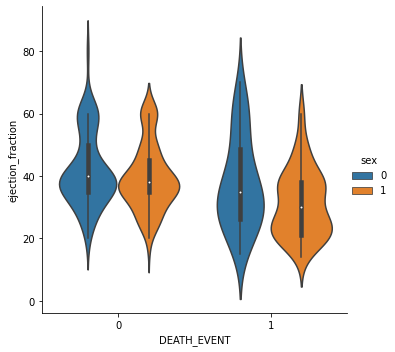

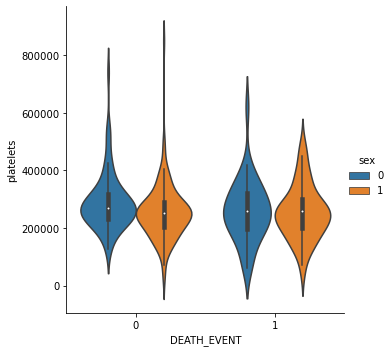

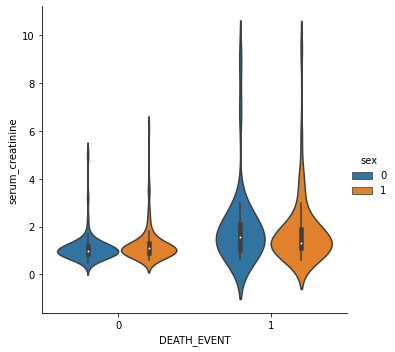

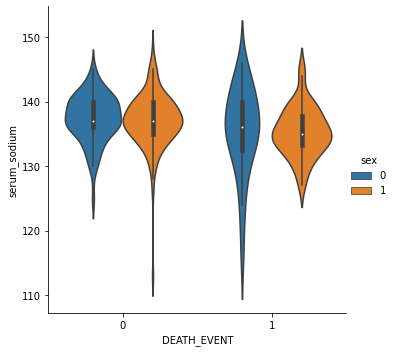

In [22]:
cat=['anaemia','diabetes','smoking','sex']
con=['creatinine_phosphokinase','age','ejection_fraction','platelets','serum_creatinine','serum_sodium']
for x in cat:
  for y in con:
      sns.catplot(x='DEATH_EVENT',y=y,hue=x,kind='violin',data=data)

# combine swarmplot() or striplot()

<b><i>Finally, there are several options for the plot that is drawn on the interior of the violins, including ways to show each individual observation instead of the summary boxplot values.
It can also be useful to combine swarmplot() or striplot() with a box plot or violin plot to show each observation along with a summary of the distribution.<b>

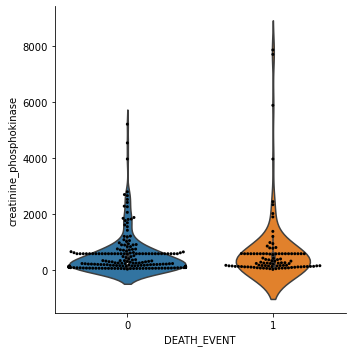

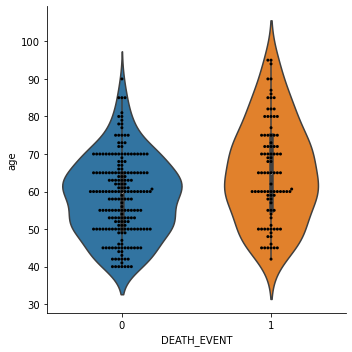

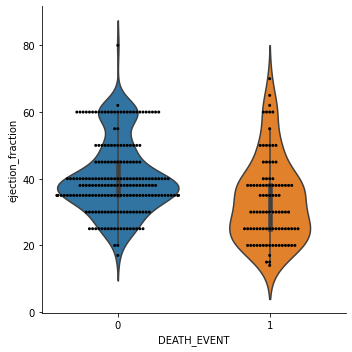

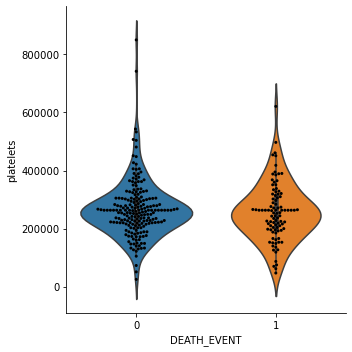

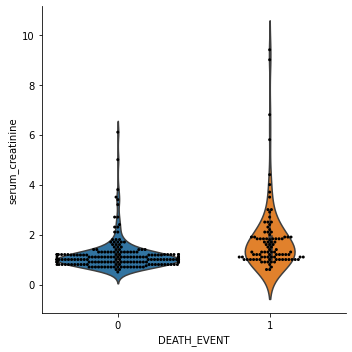

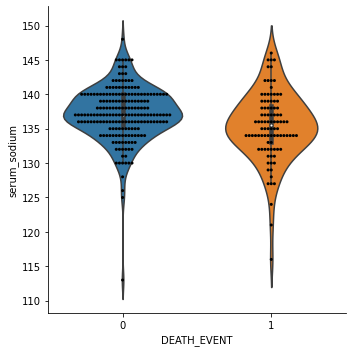

In [23]:
cat=['anaemia','diabetes','smoking','sex']
con=['creatinine_phosphokinase','age','ejection_fraction','platelets','serum_creatinine','serum_sodium']
for y in con:
      plot=sns.catplot(x='DEATH_EVENT',y=y,kind='violin',data=data)
      sns.swarmplot(x='DEATH_EVENT',y=y,data=data,color="k", size=3,ax=plot.ax)


# 4. Statistical estimation within categories
  # Bar Plot

<span style="color:seagreen;font-size:18px;font-family: 'Lobster', cursive;">📍Kind="bar"</span>

<div class="alert alert-block alert-info">📌<b> A bar plot</b> is a plot that presents categorical data with rectangular bars with lengths proportional to the values that they represent. A bar plot shows comparisons among discrete categories. One axis of the plot shows the specific categories being compared, and the other axis represents a measured value.</div>

Hence in this case you can easily observe each case through plot using its standard definition :))

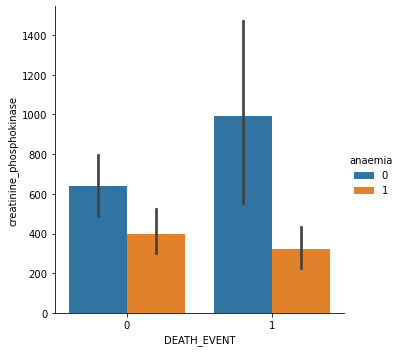

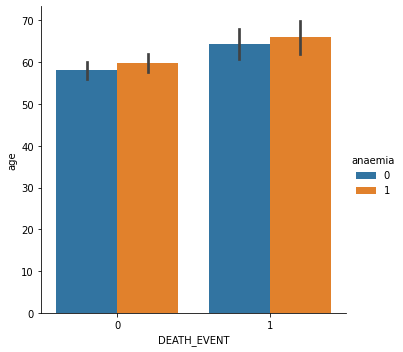

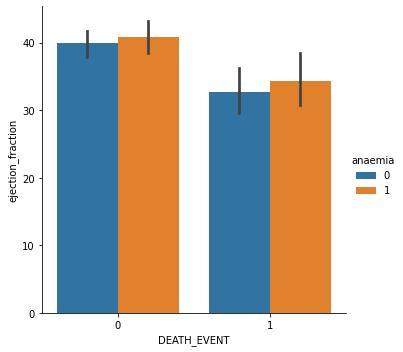

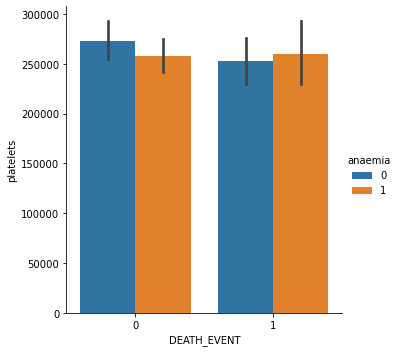

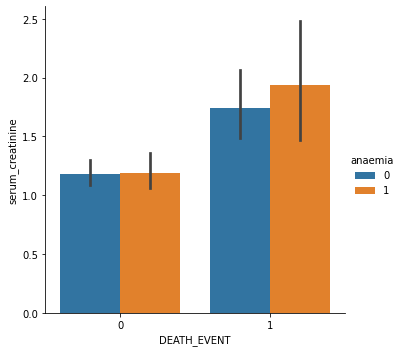

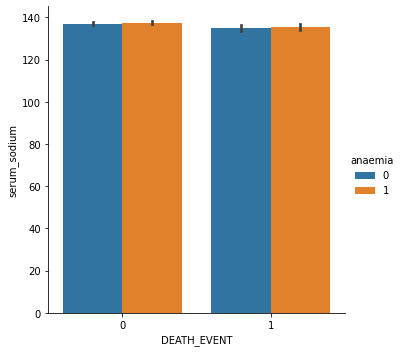

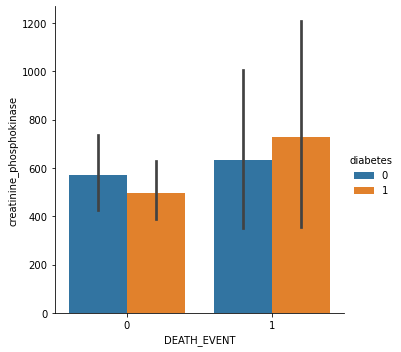

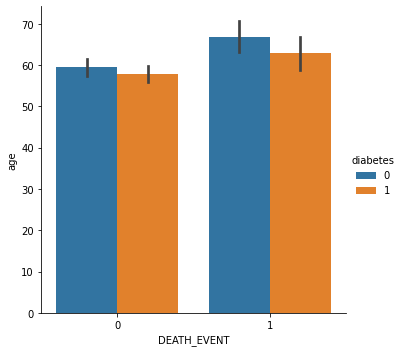

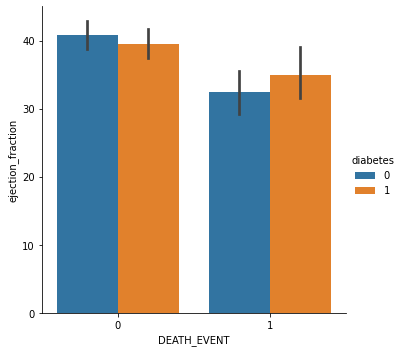

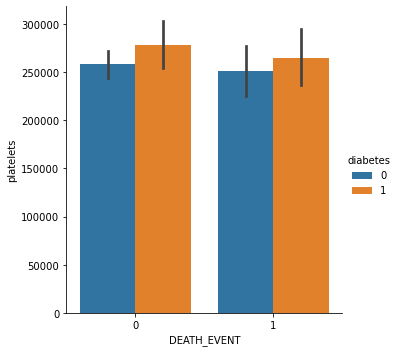

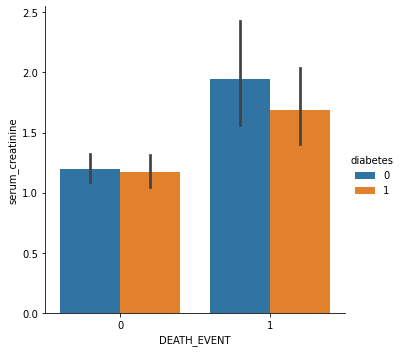

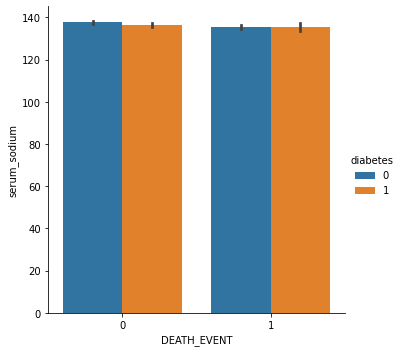

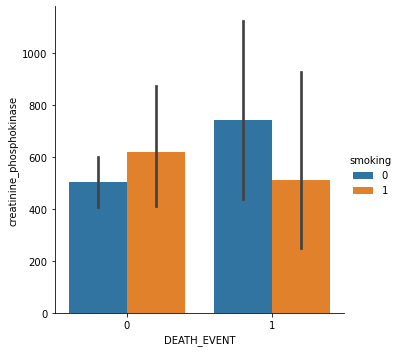

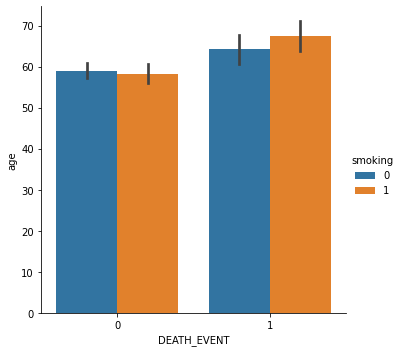

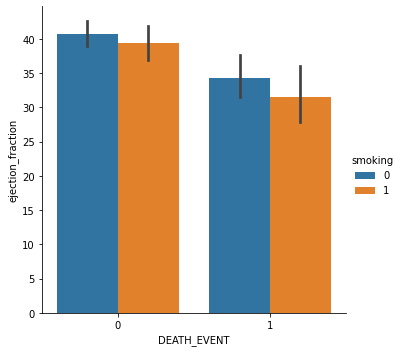

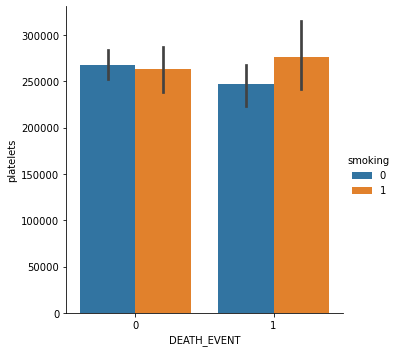

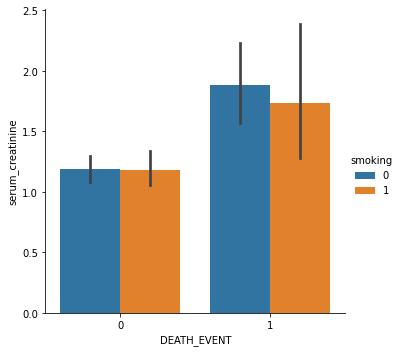

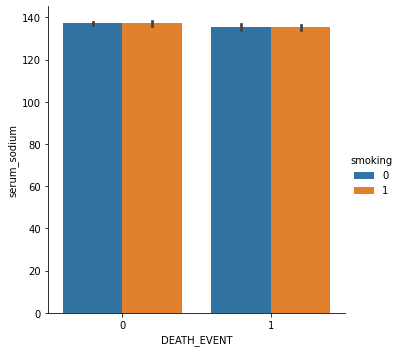

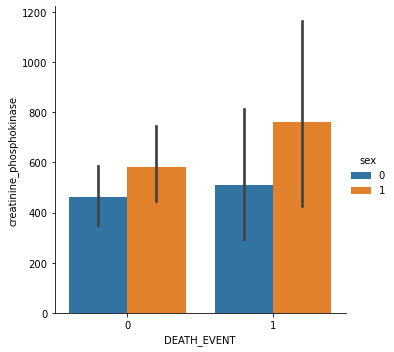

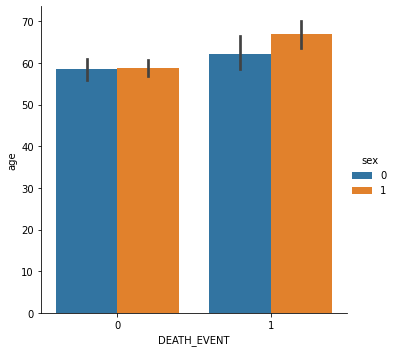

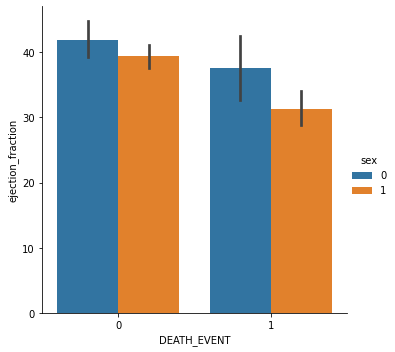

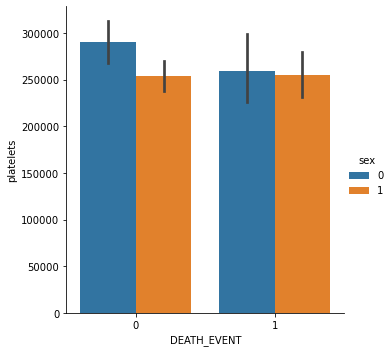

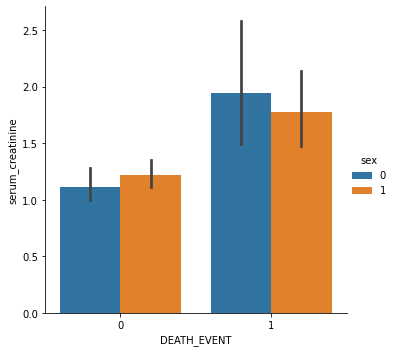

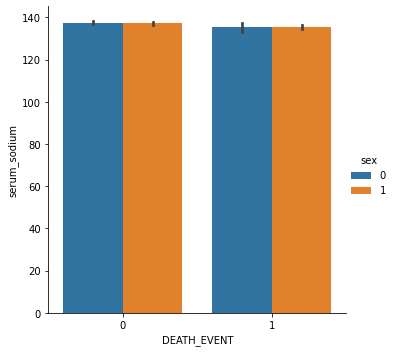

In [24]:
cat=['anaemia','diabetes','smoking','sex']
con=['creatinine_phosphokinase','age','ejection_fraction','platelets','serum_creatinine','serum_sodium']
for x in cat:
  for y in con:
      sns.catplot(x='DEATH_EVENT',y=y,hue=x,kind='bar',data=data)

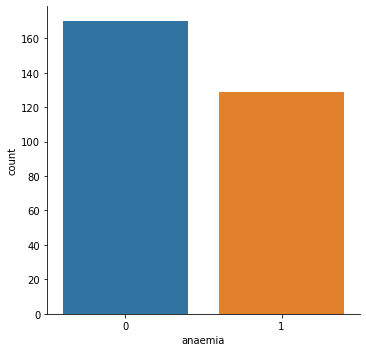

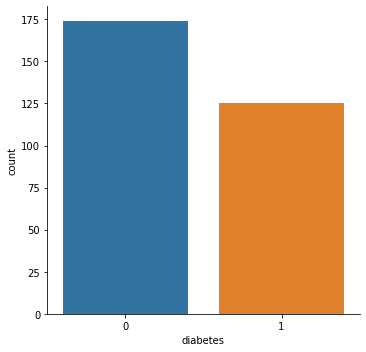

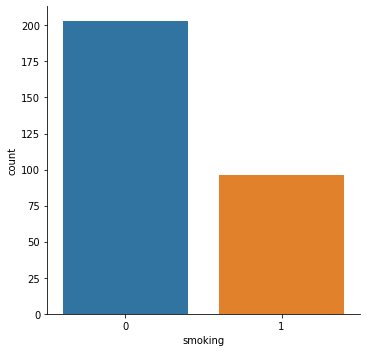

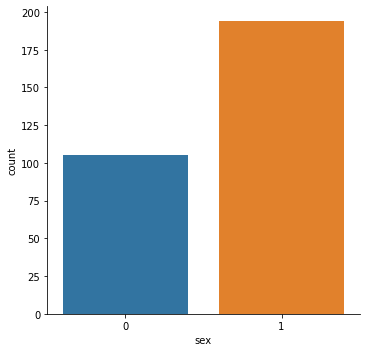

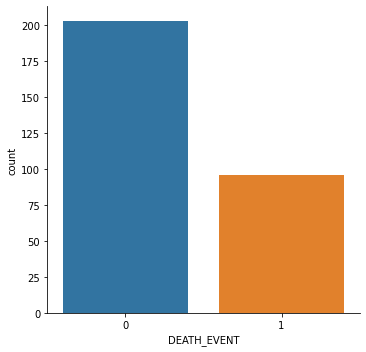

In [25]:
cat=['anaemia','diabetes','smoking','sex','DEATH_EVENT']
for x in cat:
      sns.catplot(x=x,kind='count',data=data)

# 5. Point plots


<div class="alert alert-block alert-info">📌 An alternative style for visualizing the same information is offered by the <b>pointplot() function.</b> This function also encodes the value of the estimate with height on the other axis, but rather than showing a full bar, it plots the point estimate and confidence interval. Additionally, pointplot() connects points from the same hue category. This makes it easy to see how the main relationship is changing as a function of the hue semantic, because your eyes are quite good at picking up on differences of slopes

Example: 

![picture](https://seaborn.pydata.org/_images/seaborn-pointplot-1.png)

![picture](https://seaborn.pydata.org/_images/seaborn-pointplot-2.png)




Source:: Google Image

While the categorical functions lack the style semantic of the relational functions, it can still be a good idea to vary the <b><i>marker and/or linestyle </b></i> along with the hue to make figures that are maximally accessible and reproduce well in black and white

Example:

![image](https://liuyi-hu.github.io/images/2017-10-15-data-vis-in-python_files/2017-10-15-data-vis-in-python_16_0.png)

Source: Google Images

<span style="color:seagreen;font-size:18px;font-family: 'Lobster', cursive;">📍Kind="point"</span>

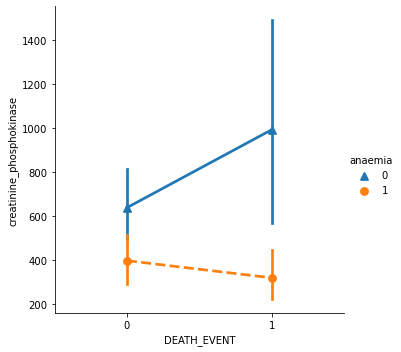

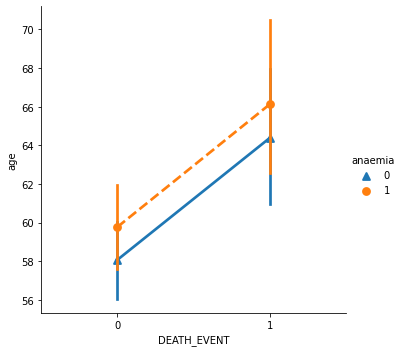

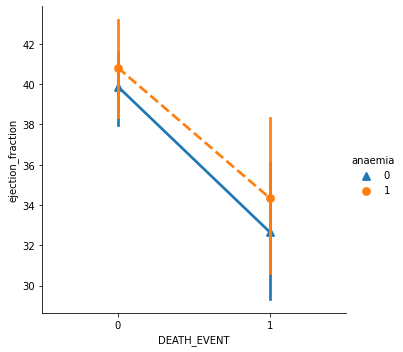

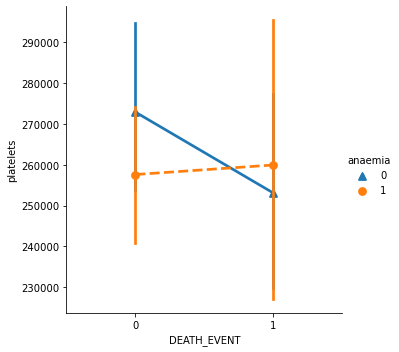

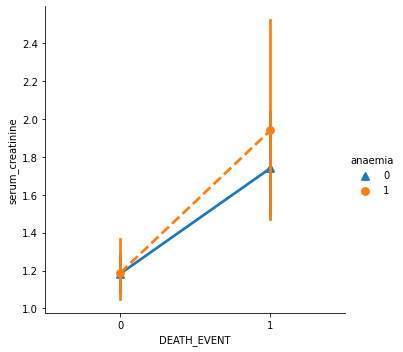

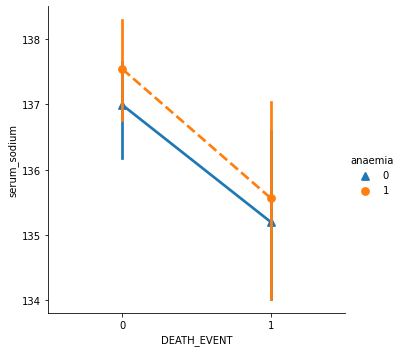

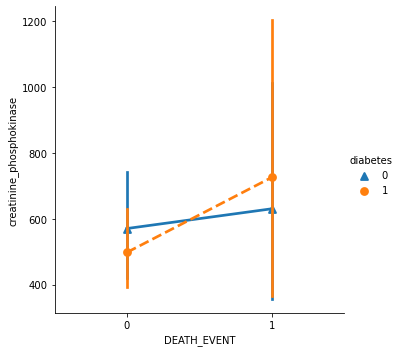

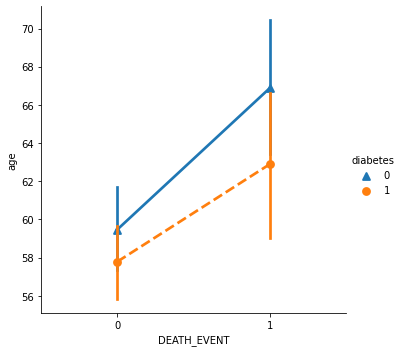

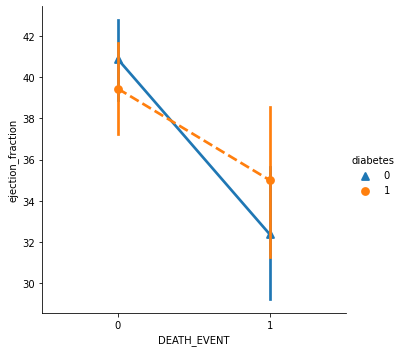

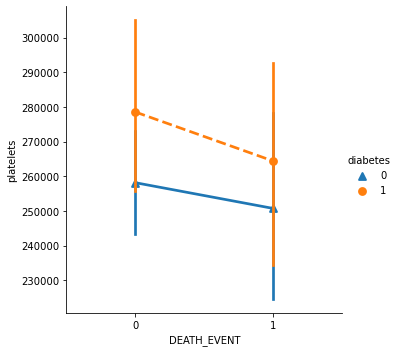

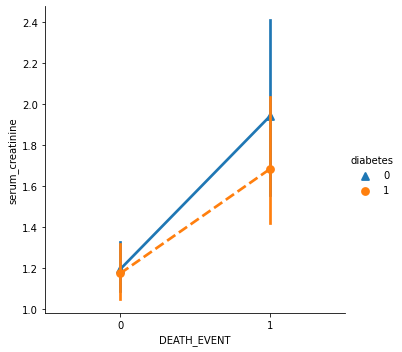

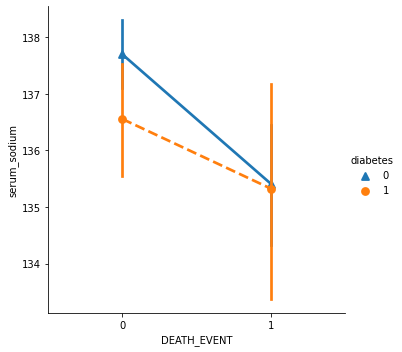

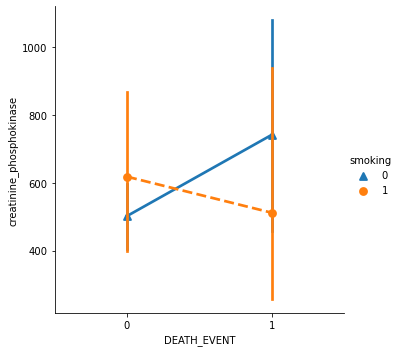

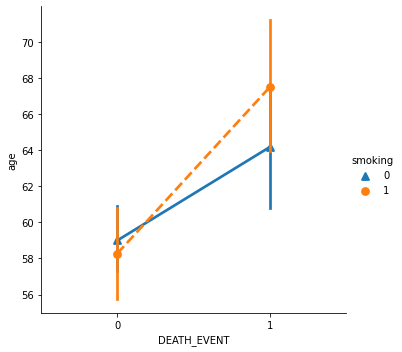

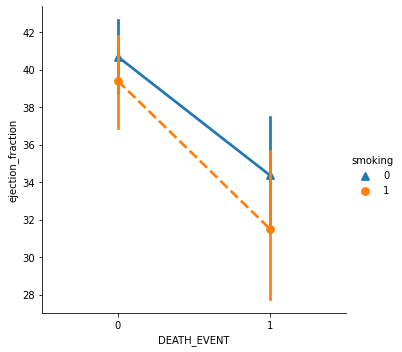

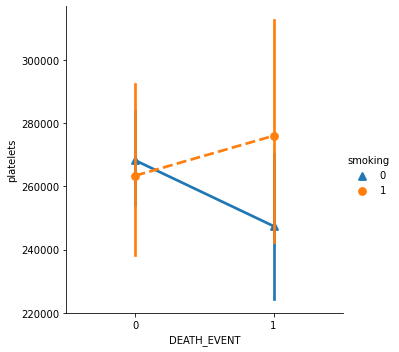

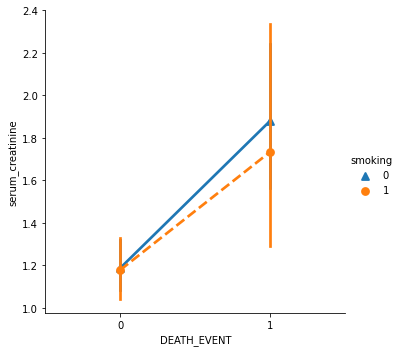

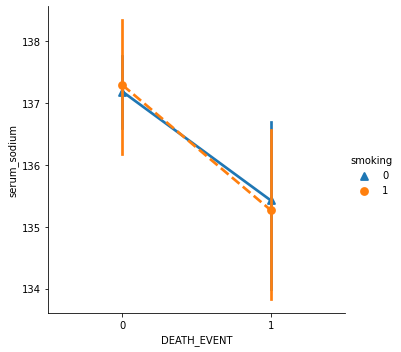

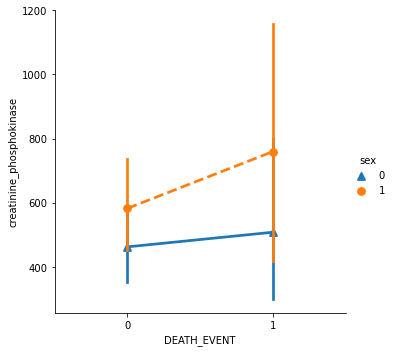

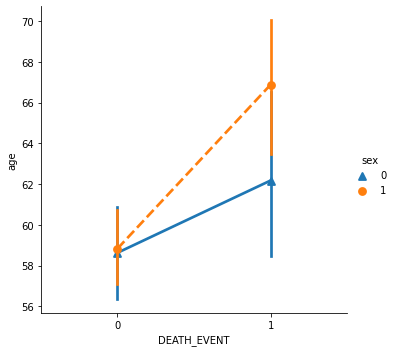

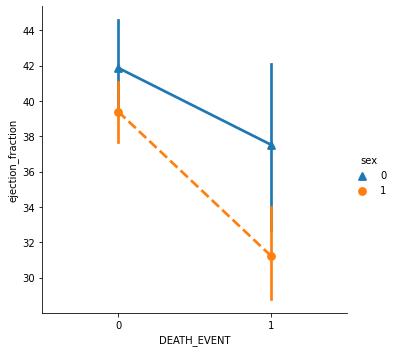

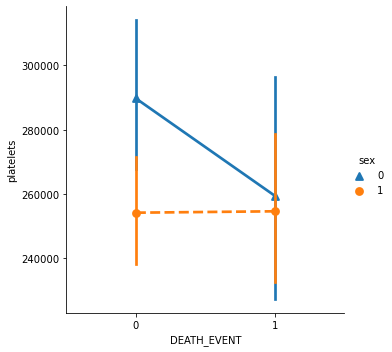

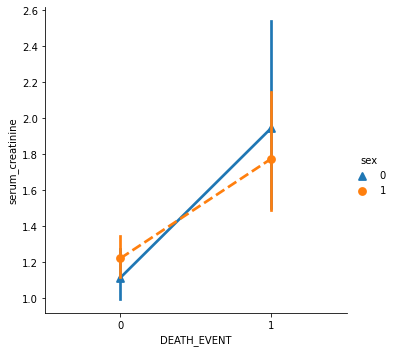

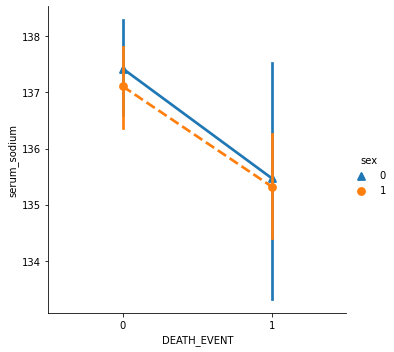

In [26]:
cat=['anaemia','diabetes','smoking','sex']
con=['creatinine_phosphokinase','age','ejection_fraction','platelets','serum_creatinine','serum_sodium']
for x in cat:
  for y in con:
      sns.catplot(x='DEATH_EVENT',y=y,hue=x,kind='point',data=data,markers=["^", "o"], linestyles=["-", "--"],)

<span style="color:hotpink;font-size:30px;font-family: 'Lobster', cursive;">Thankyou for giving this a read✌️. 😊</span>